# FINAL YEAR PROJECT

## Overview

1. Introduction

## 1 Introduction

### 1.1 Background

### 1.2 Data Description

Dataset from https://www.kaggle.com/junyiacademy/learning-activity-public-dataset-by-junyi-academy

**Acknowledgements**

This dataset belongs to Junyi Academy and is publicly available for anyone to use under the following terms provided by the policy. Everyone using this dataset should follow the Creative Commons BY-NC-SA 4.0 license.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4924670%2F58e4b78490377106c07ab42f6fe4f6af%2F_LOGO-03.png?generation=1589354460688616&alt=media" alt="drawing" width="200"/>

The authorized content does not include other intellectual properties including but not limited to the patents, trademark, and logo provided by Junyi Academy.

Anyone using this dataset should not distort the information. Junyi Academy disclaims behaviors that may cause any possible damage to users of Junyi Academy. The person who caused the damage should be held responsible for compensation.

Junyi Academy under reasonable conditions could ask the user of the dataset to share their feedback and research results with the community to encourage knowledge sharing and empower the education for the next generation.

**Info_Content.csv**

The content in Junyi Academy contains exercises, videos, and exams.
All the content in this dataset is in the type of exercise.

An exercise is a basic unit for students to learn a certain concept.
There are multiple problems in a single exercise that all relate to a certain concept.

This table records the metadata and hierarchy structure of each exercise in Junyi Academy.
There are three difficulty settings for each content, which indicates how hard it is to learn the concept.
The learning stage is separated into three stages: Elementary, Junior, and Senior.

The exercises in Junyi Academy are organized in a tree-like structure.
The current dataset release has four levels in the hierarchy.

| Variable Name | Description |
|:-|:-|
| ucid | The hashed unique ID of the content. |
| content_pretty_name | The Chinese display name of this content. |
| content_kind | The kind of this content. The current dataset release only includes `Exercise` |
| difficulty | The difficulty of this content. There are four possible values: `Easy`, `Normal`, `Hard` and `Unset`. Unset means |
| learning stage | The subject of this content. The current dataset release only includes `math` |
| subject | The learning stage of this content. There are three possible values: `Elementary`, `Junior` and `Senior`. |
| level1_id | The hashed level 1 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level2_id | The hashed level 2 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level3_id | The hashed level 3 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level4_id | The hashed level 4 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |

**Info_UserData.csv**

This table contains the metadata for the 72,758 select users for this dataset

All of the select users are students who meet the following filtering criteria:

The registered date is between 2018-08-01 and 2019-07-31
User grade is between 1 and 12
User city is not null
Energy Points are earned from Junyi Academy after completing exercises, watching videos, and when the user receives a badge.

A user earns 750 * (effective watching time / video length) energy points after watching a video.
(Effective watching time for a 10-minute video at 2X speed will be only 5-minute)

A user earns a base of 75 energy points after completing an exercise at level 0.
(Details of the leveling system will be described in the Proficiency Mechanism Section in Log_Problem's description)

This might increase to at most 225 due to fast answering speed or repeated correct attempts.
The points earned will decrease to as few as 5 as the user's level of that exercise increase to encourage the user to practice other exercises.

The users might have teachers that can assign exercises to a student and look at the progress and results of the assignments.
The student can also add himself/herself as a teacher of their own or other students.
Classes are a group of students with a certain teacher.

| Variable Name | Description |
|:-|:-|
| uuid | The unique ID of this user |
| gender | The gender of this user. There are four possible values: `male`, `female`, `unspecified` and `null`. |
| points | The user will receive energy points from the Junyi Academy after completing exercises, watching videos, and when the user receives a badge. |
| badges_cnt | Badges are awarded to the users when the user achieves certain conditions. |
| first_login_date_TW | The first login date after the user registers to Junyi Academy. |
| user_grade | The grade of the user. The possible values are between 1 and 12. |
| user_city | The resident city of the user. |
| has_teacher_cnt | The number of teachers this user has in the Junyi Academy. |
| is_self_coach | Does the user add himself/herself as a teacher of their own? |
| has_student_cnt | The number of students this user has in the Junyi Academy. Despite the user role of this user is a student, this user can still add another user as a student. |
| belongs_to_class_cnt | The number of classes this user belongs to. |
| has_class_cnt | The number of classes this user created to add other users. Despite the user role of this user is a student, this user can still create a class to add other users in. |

**Log_Problem.csv**

An exercise is a basic unit for students to learn a certain concept.
There are multiple problems in a single exercise that all relate to a certain concept.

This table records the attempt logs when students try to answer each problem.

The attempt timestamp is rounded to the closest 15-minute interval to reduce privacy concerns.
The uuid and ucid can be used to join the other tables (InfoUserData, InfoContent)

The problem_number refers to the number of problems the user had attempted including this attempt in this exercise.
The exercise_problem_repeat_session refers to the number of times the user encounters this problem in this exercise.

We define the answer to be correct when the user answered the correct answer the first time and does not use any hints.
There are hints that the student can use that provides a step-by-step guide to get the correct answer.
Each time a student uses a hint, a step of the step-by-step guide is shown.

The Proficiency Mechanism
According to the forgetting curve proposed by psychologist Hermann Ebbinghaus, by doing spaced repetition review in learning, we can improve the memory of the newly learned concepts and knowledge.

To achieve this, Junyi Academy used the "Proficiency Mechanism" to encourage students to come back and review at regular intervals.
The "Proficiency Mechanism" allows students to convert short-term memory into long-term memory through appropriate and repeated review.

There are five possible levels, all users start from level 0 and progress to level 4 which we considered Proficient for that exercise.

To reach level 1, the user will have to answer the problems correctly 5 times in the recent 6 problems attempts in the exercise.

After reaching level 1, the user is required to wait 6 hours before he/she is able to attempt to level up again to level 2.

After the waiting, the user will answer 2 problems from the exercise. For example, the user is at level 2 and get a chance to answer 2 problems:

- If both are correct, the user is upgraded to level 3.
- If both are incorrect, the user is downgraded to level 1.
- If one of them is correct and one of them is incorrect, the level is unchanged and the user is prompted to try again the challenge.

The procedure to upgrade or downgrade is the same for the other levels. But users will not be downgraded at level 1 or when the user reaches level 4 Proficient.

After reaching level 2, the user is required to wait 16 hours before he/she is able to attempt to level up again to level 3.

After reaching level 3, the user is required to wait 40 hours before he/she is able to attempt to level up again to level 4, which is the final level and considered Proficient for that exercise.

| Variable Name | Description |
|:-|:-|
| timestamp_TW | The timestamp of the first behavior, answered the problem or used a hint. It is in UTC+8 timezone and rounded to the closest 15 mins interval to preserve privacy. |
| uuid | The unique ID of the user. It can be used to join with Info_UserData. |
| ucid | The unique ID of the content. It can be used to join with Info_Content. |
| upid | The unique ID of the problem. |
| problem_number | The number of problems this user had encountered, including this problem, in this exercise. |
| exercise_problem_repeat_session | The number of times the user encounters this problem in this exercise |
| is_correct | Whether the answer is considered correct or not. Only if the student answered the correct answer for the first time will it be `TRUE`. If the student used a hint or answered the wrong answer for the first time, it will be `FALSE`. |
| total_sec_taken | How many seconds the user use for this problem encounter |
| total_attempt_cnt | How many times have the user submitted an answer for this problem encounter |
| used_hint_cnt | How many hints the user have used for this problem encounter |
| is_hint_used | Whether the user use a hint or not. |
| is_downgrade | After this attempt, is the user upgraded to the next level? Please refer to the detailed data description for the Proficiency Mechanism. |
| is_upgrade | After this attempt, is the user downgraded to the next level? Please refer to the detailed data description for the Proficiency Mechanism. |
| level | After this attempt, which level does this user belong to in this exercise? There are five possible levels. All users start from level 0 and declare Proficient at level 4. Please refer to the detailed data description for the Proficiency Mechanism. |

### 1.3 Problem Statement

## 2 Importing Data

Data can come from a variety of sources. You can import CSV files from your local machine, query SQL servers, or use a web scraper to strip data from the Internet. I like to use the Python library, Pandas, to import data. Pandas is a great open-source data analysis library. We will also be using Pandas in the data cleaning step of this workflow.

### 2.1 Importing the Libraries

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pymongo
from googletrans import Translator # Google translate
import re #search regex
from datetime import datetime

In [3]:
def get_category_name(category_id):
    for category, id_ in category_codes.items():    
        if id_ == category_id:
            return category

In [4]:
def trim_outliers(df, variable):
    p01=school[variable].quantile(q=0.01)
    p99=school[variable].quantile(q=0.99)
    
    school.ix[(school[variable]<p01) | (school[variable]>p99), variable]=np.nan

In [5]:
# set seed for reproducibility
np.random.seed(0)

### Import the Datasets

In [6]:
%%time
log_problem_raw_df = pd.read_csv('data/Log_Problem.csv')
info_userdata_raw_df = pd.read_csv('data/Info_UserData.csv', index_col=0)
info_content_raw_df = pd.read_csv('data/Info_Content.csv', index_col=0)

Wall time: 5min 7s


In [8]:
log_problem_raw_df

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217306,2019-04-28 18:30:00 UTC,OhWXH8C9z/xwoVDoZ8E5HlQcZKQT90HeNxiMoBb8zu4=,dp0m1kS6Bygoksx9S/gkBqTcWPoglbf1HT3Ma3U3N8U=,HROyctImDBKuPzjUmVSIohpPweqOuiui22XdmzgKM8I=,7,1,True,11,1,0,False,False,True,2
16217307,2019-04-25 19:15:00 UTC,EuYrT0f2bBxb1mZgHVsuxgwx3v1M5ObPf6Hxx5JGoYE=,WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=,KbXWuEmsRHIjtQ0iVYmnpnPoDPzKMSRYo7QiezC664s=,24,2,True,31,1,0,False,False,True,2
16217308,2019-04-25 21:30:00 UTC,CCM2Y18/BIKVuA1YF76my0pEPuniFUQGDaHB/uRnvak=,ZcwX8fZUrnZDOsvBOPux3Oaf1viIG83MNe5frh0jnQw=,tfg/S0CdP/aN7ZW8N1hhSJ1Nq/bOFXdtLGkpQYFMzBg=,10,1,True,32,1,0,False,NaN,NaN,0
16217309,2019-04-12 16:30:00 UTC,kdK8yywPKV0DPbIC7gagzvPyxpC05fA4T9GCBscO2Rk=,HKqPgUALqZGw984KFqAMeDwDJTi9cNhJ51UXfjzELSg=,qAAyk/Jf5/muzMzQ9YaWGQPT10enAZctCKNrm3dQ1IY=,40,3,True,22,1,0,False,NaN,NaN,2


In [7]:
log_problem_raw_df.columns

Index(['timestamp_TW', 'uuid', 'ucid', 'upid', 'problem_number',
       'exercise_problem_repeat_session', 'is_correct', 'total_sec_taken',
       'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_downgrade',
       'is_upgrade', 'level'],
      dtype='object')

In [10]:
info_userdata_raw_df

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
ESAeVlIpxgtgb2EtZb8K+plFLqKch5ffAgRzKnQqTQ4=,NaN,2393,2,2019-01-23,10,tc,1,False,0,1,0
DBQkIr4grFmnG2Aml3+haxfHbxp0kgerOxJfJ9JEWpE=,NaN,1283,0,2019-01-23,10,chc,0,False,0,0,0
2KR+J0mQ2231WhAzulTMJ7ZuyKj43bPYbSdefVwOeQc=,NaN,5059,2,2019-01-23,10,tp,0,False,0,0,0


In [11]:
info_userdata_raw_df.columns

Index(['gender', 'points', 'badges_cnt', 'first_login_date_TW', 'user_grade',
       'user_city', 'has_teacher_cnt', 'is_self_coach', 'has_student_cnt',
       'belongs_to_class_cnt', 'has_class_cnt'],
      dtype='object')

In [12]:
info_content_raw_df

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
...,...,...,...,...,...,...,...,...,...
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=


In [13]:
info_content_raw_df

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
...,...,...,...,...,...,...,...,...,...
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=


In [15]:
log_problem_df = log_problem_raw_df.copy()
info_userdata_df = info_userdata_raw_df.copy()
info_content_df = info_content_raw_df.copy()

The dataset is too large so scale down abit.

In [80]:
# scale down some records
log_problem_df = log_problem_df[log_problem_df['timestamp_TW'] < '2018-11-01']

### 3.1 Handling Missing Values
The first thing to do when you get a new dataset is take a look at some of it. This lets you see that it all read in correctly and gives an idea of what's going on with the data. In this case, let's see if there are any missing values, which will be reprsented with NaN or None.

- Log Problem

In [92]:
log_problem_df.head(5)

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
6814,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,False,NaN,NaN,0
6815,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,6,1,True,26,1,0,False,NaN,NaN,0
6816,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,4,1,True,78,1,0,False,NaN,NaN,0
6817,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,3,1,True,7,1,0,False,NaN,NaN,0
6818,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,12,1,True,48,1,0,False,False,True,1


In [93]:
# get the number of missing data points per column
missing_values_count = log_problem_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

timestamp_TW                             0
uuid                                     0
ucid                                     0
upid                                     0
problem_number                           0
exercise_problem_repeat_session          0
is_correct                               0
total_sec_taken                          0
total_attempt_cnt                        0
used_hint_cnt                            0
is_hint_used                             0
is_downgrade                       2480845
is_upgrade                         2480845
level                                    0
dtype: int64

In [94]:
# how many total missing values do we have?
total_cells = np.product(log_problem_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

12.84915061082857


In [95]:
# replace all NA's with false
log_problem_df = log_problem_df.fillna('false')

In [96]:
# get the number of missing data points per column
missing_values_count = log_problem_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

timestamp_TW                       0
uuid                               0
ucid                               0
upid                               0
problem_number                     0
exercise_problem_repeat_session    0
is_correct                         0
total_sec_taken                    0
total_attempt_cnt                  0
used_hint_cnt                      0
is_hint_used                       0
is_downgrade                       0
is_upgrade                         0
level                              0
dtype: int64

- Info User

In [87]:
info_userdata_df.head(5)

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [88]:
# get the number of missing data points per column
missing_values_count = info_userdata_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

gender                  39853
points                      0
badges_cnt                  0
first_login_date_TW         0
user_grade                  0
user_city                   0
has_teacher_cnt             0
is_self_coach               0
has_student_cnt             0
belongs_to_class_cnt        0
has_class_cnt               0
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [89]:
# how many total missing values do we have?
total_cells = np.product(info_userdata_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.979521152313147


In [90]:
# replace all NA's with unspecified
info_userdata_df = info_userdata_df.fillna('unspecified')

In [91]:
# get the number of missing data points per column
missing_values_count = info_userdata_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

gender                  0
points                  0
badges_cnt              0
first_login_date_TW     0
user_grade              0
user_city               0
has_teacher_cnt         0
is_self_coach           0
has_student_cnt         0
belongs_to_class_cnt    0
has_class_cnt           0
dtype: int64

In [97]:
info_content_df.head(5)

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


In [98]:
# get the number of missing data points per column
missing_values_count = info_content_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

content_pretty_name    0
content_kind           0
difficulty             0
subject                0
learning_stage         0
level1_id              0
level2_id              0
level3_id              0
level4_id              0
dtype: int64

In [99]:
# how many total missing values do we have?
total_cells = np.product(info_content_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


There is no missing values for the Info Content dataset, nothing has been changed.

## Outlier Removal

In [16]:
log_problem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16217311 entries, 0 to 16217310
Data columns (total 14 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   timestamp_TW                     object
 1   uuid                             object
 2   ucid                             object
 3   upid                             object
 4   problem_number                   int64 
 5   exercise_problem_repeat_session  int64 
 6   is_correct                       bool  
 7   total_sec_taken                  int64 
 8   total_attempt_cnt                int64 
 9   used_hint_cnt                    int64 
 10  is_hint_used                     bool  
 11  is_downgrade                     object
 12  is_upgrade                       object
 13  level                            int64 
dtypes: bool(2), int64(6), object(6)
memory usage: 1.5+ GB


In [ ]:
log_problem_df.describe()

In [24]:
# Detect outliers using quantile
Q1 = np.quantile(log_problem_df['total_sec_taken'],0.25)
Q3 = np.quantile(log_problem_df['total_sec_taken'],0.75)
IQR = Q3 - Q1

In [26]:
print(IQR)

35.0


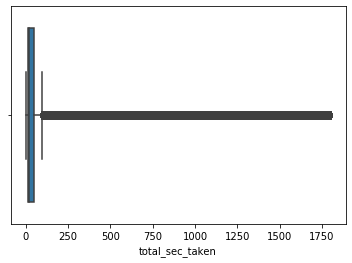

In [21]:
sns.boxplot(x=log_problem_df['total_sec_taken'])

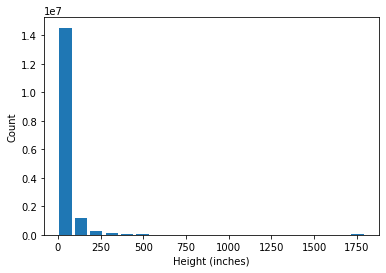

In [49]:
plt.hist(log_problem_df.total_sec_taken, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [31]:
print(Q3 + 1.5 * IQR)

97.5


In [ ]:
### Remove outliers

In [41]:
max_thresold = log_problem_df['total_sec_taken'].quantile(0.95)
max_thresold

min_thresold = log_problem_df['total_sec_taken'].quantile(0.05)
min_thresold

4.0

In [51]:
xx = log_problem_df[(log_problem_df['total_sec_taken']<max_thresold) & (log_problem_df['total_sec_taken']>min_thresold)]

In [39]:
xx.describe()

count    1.474141e+07
mean     2.582334e+01
std      2.157486e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.800000e+01
75%      3.600000e+01
max      9.700000e+01
Name: total_sec_taken, dtype: float64

TypeError: can only concatenate str (not "int") to str

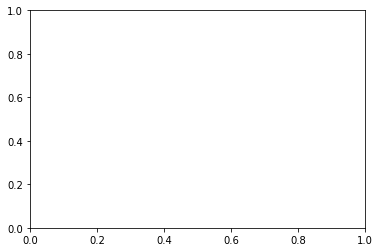

In [52]:
sns.boxplot(x=xx)

### Handling Text

In [100]:
df_InfoContent['content_pretty_name'].tail(5)

ucid
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=     【進階】平方公分綜合習題
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=    【進階】周長與面積綜合習題
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=     【一般】平方公分綜合習題
W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=    【一般】周長與面積綜合習題
gvez7GFXUbuQl27U5+p/4QwFZZyXP2QFYQdoor8ZkeE=     【一般】周長與面積的應用
Name: content_pretty_name, dtype: object

- Cleaning Text

In [101]:
df_InfoContent['content_pretty_name'] = df_InfoContent['content_pretty_name'].replace(to_replace=r'\【.*\】', value='', regex=True)

In [102]:
df_InfoContent['content_pretty_name']

ucid
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=    怎樣解題：數量關係
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=       和差問題 1
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=       雞兔問題 1
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=       年齡問題 1
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=         追趕問題
                                                  ...    
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=     平方公分綜合習題
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=    周長與面積綜合習題
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=     平方公分綜合習題
W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=    周長與面積綜合習題
gvez7GFXUbuQl27U5+p/4QwFZZyXP2QFYQdoor8ZkeE=     周長與面積的應用
Name: content_pretty_name, Length: 1330, dtype: object

- Translating Text

In [103]:
translator = Translator() # initialize the Translator object
df_InfoContent['content_pretty_name'] = df_InfoContent['content_pretty_name'].apply(translator.translate, src='zh-tw', dest='en').apply(getattr, args=('text',))

In [114]:
df_InfoContent.tail(25)

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
cvrpe2HqRWypDZTWd3ry5QCy4XdRg67y3MIeZlRYaes=,Comprehensive exercises for kilograms and grams,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,3fgcSGTzD9uuOjoB5R7onIyqBhvluj0aVuSIpMfqLdQ=,jLZ490t6hQgfXklhPDMsb0Mt2O/1Oh4bjzk/WCIuEDI=
jpb1rgDXjbe7vvSvZzIoPtn6mVIKPxauQ1QVTvzkAdw=,Comprehensive exercises for large units in dai...,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,3fgcSGTzD9uuOjoB5R7onIyqBhvluj0aVuSIpMfqLdQ=,PmvKyOgXaZD0sdpQTlIkVXfBzlUEcSoPM+PcqrAhY8A=
TOdFpZ3Xqdh28DnIte6gehxDLIIUkzWMwfqed8sEJwE=,Daily applications of metric tons and kilograms,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,3fgcSGTzD9uuOjoB5R7onIyqBhvluj0aVuSIpMfqLdQ=,PmvKyOgXaZD0sdpQTlIkVXfBzlUEcSoPM+PcqrAhY8A=
Mujc7fhlpiAZ/8+VvJTuahAOrjvNECvtA4YBD6fP02Y=,"Conversion of square kilometers to hectares, a...",Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,3fgcSGTzD9uuOjoB5R7onIyqBhvluj0aVuSIpMfqLdQ=,PmvKyOgXaZD0sdpQTlIkVXfBzlUEcSoPM+PcqrAhY8A=
7lZW5SB9whu/nq0QJ1pCSdPhmnwhRqHIldZ1Fu9tZfc=,Unit conversion and size comparison between li...,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=
Km4UtamxG5HOGBYO5bAFwlruZSFNKxlILK2wKiFEcSI=,Liter and milliliter comprehensive exercises,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=
fwR0w0LLlf3OriHwW2vIK3RiKD8gRLRfHC1T6kQhG0g=,Know ml,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=
tcefpcahExZLA6gms/r4H1DHPHzmBUwg8h7hfNlV4sc=,Know the liter,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=
FJV9jFDQLQAIAZoc7YboSSkQOkS3dNtCQAVDL874AKM=,Capacity application problem,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=


### Parsing Date

In [105]:
df_InfoUser['date_login'] = pd.to_datetime(df_InfoUser['first_login_date_TW'], format='%Y-%m-%d')
df_InfoUser['year_login'] = df_InfoUser['date_login'].apply(lambda x: x.year)
df_InfoUser['month_login'] = df_InfoUser['date_login'].apply(lambda x: x.month)
df_InfoUser['day_login'] = df_InfoUser['date_login'].apply(lambda x: x.day)

In [106]:
df_LogProblem['datetime_attempt'] = pd.to_datetime(df_LogProblem['timestamp_TW'], format='%Y-%m-%d %H:%M:%S %Z')
df_LogProblem['year_attempt'] = df_LogProblem['datetime_attempt'].apply(lambda x: x.year)
df_LogProblem['month_attempt'] = df_LogProblem['datetime_attempt'].apply(lambda x: x.month)
df_LogProblem['day_attempt'] = df_LogProblem['datetime_attempt'].apply(lambda x: x.day)

In [107]:
df_LogProblem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,datetime_attempt,year_attempt,month_attempt,day_attempt
6814,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,False,false,false,0,2018-09-28 20:00:00+00:00,2018,9,28
6815,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,6,1,True,26,1,0,False,false,false,0,2018-09-28 10:15:00+00:00,2018,9,28
6816,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,4,1,True,78,1,0,False,false,false,0,2018-09-05 20:00:00+00:00,2018,9,5
6817,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,3,1,True,7,1,0,False,false,false,0,2018-09-14 16:30:00+00:00,2018,9,14
6818,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,12,1,True,48,1,0,False,False,True,1,2018-09-13 16:00:00+00:00,2018,9,13


### Merge Dataset

In [108]:
merge_df_LogProblem_InfoUser = df_LogProblem.merge(df_InfoUser, how='left', on = 'uuid')

In [109]:
merge_df_LogProblem_InfoUser.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,date_login,year_login,month_login,day_login
0,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,...,ml,10,True,1,10,1,2018-09-05,2018,9,5
1,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,6,1,True,26,1,0,...,chc,1,False,0,1,0,2018-09-07,2018,9,7
2,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,4,1,True,78,1,0,...,ty,0,False,0,0,0,2018-09-05,2018,9,5
3,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,3,1,True,7,1,0,...,ml,1,False,0,2,0,2018-09-14,2018,9,14
4,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,12,1,True,48,1,0,...,ty,4,False,0,3,0,2018-09-11,2018,9,11


In [110]:
merge_df_LogProblem_InfoUser_InfoContent = merge_df_LogProblem_InfoUser.merge(df_InfoContent, how='left', on = 'ucid')

In [111]:
merge_df_LogProblem_InfoUser_InfoContent.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,day_login,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,...,5,倍數的應用,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
1,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,6,1,True,26,1,0,...,7,找出最小公倍數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
2,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,4,1,True,78,1,0,...,5,尋找質因數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,DoAefIneFglvkxJ4Jb8VyB8JrESm9UEHtGyV4MqiwCo=
3,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,3,1,True,7,1,0,...,14,Introduction to related terms of number,Exercise,easy,math,junior,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,/yqeM1FRP1rB9WuQWBkStMqrBQgjEexaeyWIhBC7ov4=,Vuo8t3kw/4IH80FuZ0l0uJPwpfrMs8SxhCbJA8zn3vU=
4,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,12,1,True,48,1,0,...,11,Addition and subtraction of large numbers,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,hq6uCe9NmtCc+0wlbGGIsxegP2cqYAdFebGd+v4/o8Q=


## Export Dataframe

In [112]:
merge_df_LogProblem_InfoUser_InfoContent.to_csv('merge_data.csv')